# Linear regression with statsmodels
## Objective
You will learn the followin:
1. How to import sample data.
2. How to view the data description.
3. How to create histograms and scatter plots.
4. How to split the data into training and test sets.
5. How to build a linear model using Statsmodels.
6. How to make predictions on the test data using the built model.

## Instructions
- This notebook contains only the expected results.
- Your task is to write the source code that generates similar (or nearly identical) results.
- Please insert your source code into the designated code cells.
- Submit your updated notebook file.

## Note on Randomess
The process of dividing the dataset into training and testing sets involves randomness due to the **train_test_split** function. Consequently, the regression results and the scatter plot results in the final step may differ between executions.

In [1]:
from sklearn.datasets import fetch_california_housing
califorina_housedata = fetch_california_housing()
print(califorina_housedata.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Text(0.5, 1.0, 'MedHouseVal')

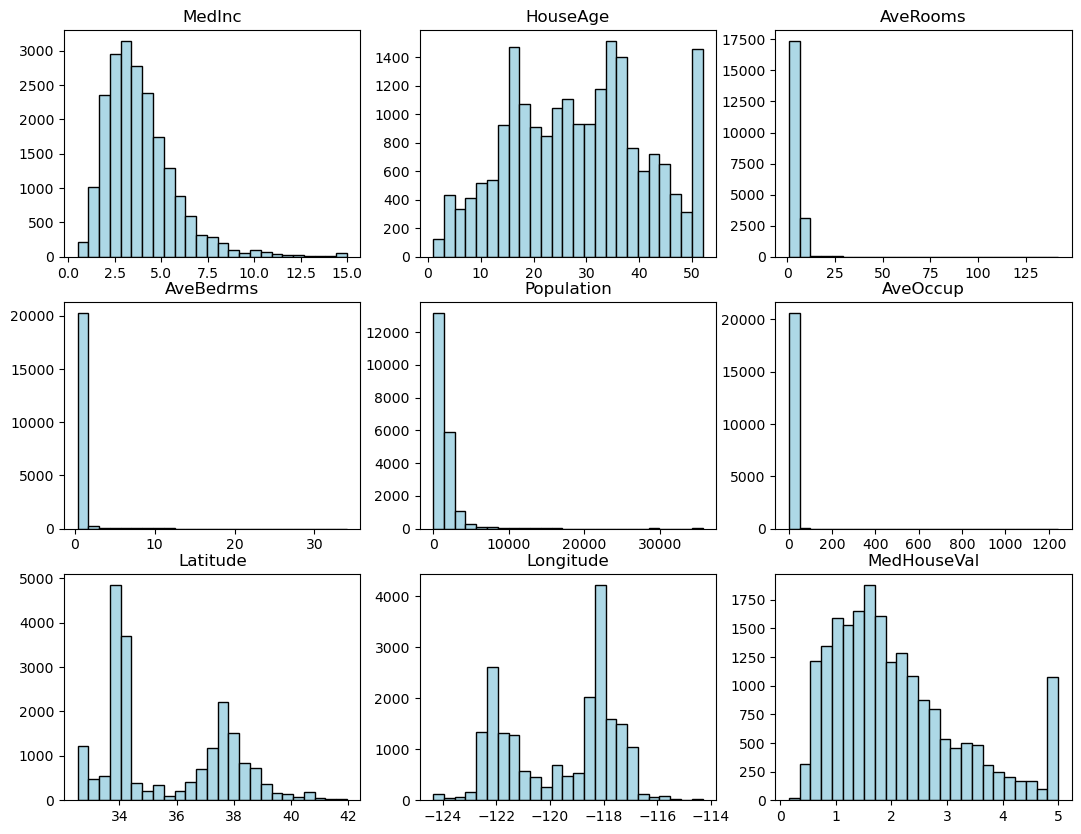

In [2]:
import matplotlib.pyplot as plt

data = califorina_housedata.data
target = califorina_housedata.target

# Create histograms for each feature
plt.figure(figsize=(13, 10))  # Adjust the figure size if needed

# Display of each histogram
plt.subplot(3, 3, 1)
plt.hist(data[:, 0], bins=25, color='lightblue', edgecolor='black')
plt.title('MedInc')

plt.subplot(3, 3, 2)
plt.hist(data[:, 1], bins=25, color='lightblue', edgecolor='black')
plt.title('HouseAge')

plt.subplot(3, 3, 3)
plt.hist(data[:, 2], bins=25, color='lightblue', edgecolor='black')
plt.title('AveRooms')

plt.subplot(3, 3, 4)
plt.hist(data[:, 3], bins=25, color='lightblue', edgecolor='black')
plt.title('AveBedrms')

plt.subplot(3, 3, 5)
plt.hist(data[:, 4], bins=25, color='lightblue', edgecolor='black')
plt.title('Population')

plt.subplot(3, 3, 6)
plt.hist(data[:, 5], bins=25, color='lightblue', edgecolor='black')
plt.title('AveOccup')

plt.subplot(3, 3, 7)
plt.hist(data[:, 6], bins=25, color='lightblue', edgecolor='black')
plt.title('Latitude')

plt.subplot(3, 3, 8)
plt.hist(data[:, 7], bins=25, color='lightblue', edgecolor='black')
plt.title('Longitude')

plt.subplot(3, 3, 9)
plt.hist(target, bins=25, color='lightblue', edgecolor='black')
plt.title('MedHouseVal')


In [13]:
import pandas as pd
# Gathering data 
table_data = {
    'MedInc': data[:, 0],
    'HouseAge': data[:, 1],
    'AveRooms':data[:, 2],
    'AveBedrms':data[:, 3],
    'Population':data[:, 4],
    'AveOccup':data[:, 5],
    'Latitude':data[:, 6],
    'Longitude':data[:, 7],
    'MedHouseVal':target,
}
df = pd.DataFrame(table_data)
# calcualte count mean std min 25% 50% 75% max 
df = df.describe()
print(df)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (16512, 8)
X test:  (4128, 8)
y train:  (16512,)
y test:  (4128,)


In [9]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.711e+04
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        18:31:22   Log-Likelihood:                         -19239.
No. Observations:               16512   AIC:                                  3.849e+04
Df Residuals:                   16504   BIC:                                  3.856e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

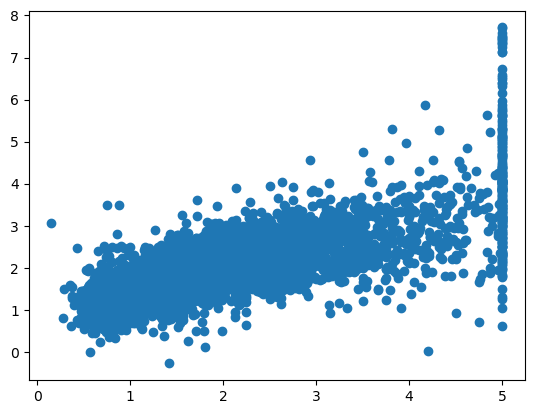

In [6]:
# Get y_pred using the training model and X_test. 
# Draw a scatter plot between y_test (x-axis) and y_pred (y-axis)
y_pred = result.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()
